<a href="https://colab.research.google.com/github/shreya024/ML-Web-App/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train_df = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/cleaned_data.csv', index_col='id')
train_df.head()

city state  ...  homeType_TOWNHOUSE  median_income
id                         ...                                   
0            Justin    TX  ...                   0        46658.0
1   Litchfield Park    AZ  ...                   0        57188.0
2         Anchorage    AK  ...                   0        66044.0
3           Berwick    ME  ...                   0        46016.0
4          Thornton    CO  ...                   1        65217.0

[5 rows x 13 columns]

In [2]:
average_price = train_df['price'].mean()

average_price

335720.26146307314

In [3]:
mean_model_df = train_df.copy()

mean_model_df['predicted'] = 335720

mean_model_df['absolute_error'] = np.abs(mean_model_df['predicted'] - mean_model_df['price'])

mean_model_df

city state  ...  predicted  absolute_error
id                            ...                           
0               Justin    TX  ...     335720         22380.0
1      Litchfield Park    AZ  ...     335720        324280.0
2            Anchorage    AK  ...     335720        103220.0
3              Berwick    ME  ...     335720        216180.0
4             Thornton    CO  ...     335720         99280.0
...                ...   ...  ...        ...             ...
22851            Macon    GA  ...     335720        160720.0
22852       Providence    RI  ...     335720         30720.0
22853         Glendale    AZ  ...     335720         30720.0
22854         Maricopa    AZ  ...     335720         24280.0
22855            Nampa    ID  ...     335720        106620.0

[22856 rows x 15 columns]

141006.19828491425

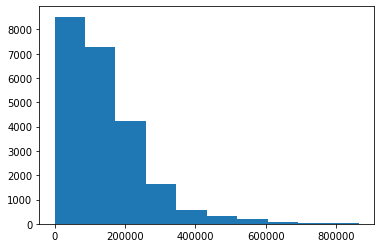

In [4]:
plt.hist(mean_model_df['absolute_error'])
mean_model_df['absolute_error'].mean()

In [5]:
square_footage_model_df = train_df.copy()
average_price_per_square_foot = (square_footage_model_df['price'] / square_footage_model_df['livingArea']).mean()

average_price_per_square_foot

195.35527446966984

In [6]:
square_footage_model_df['predicted'] = 195 * square_footage_model_df['livingArea']

np.abs(square_footage_model_df['predicted'] - square_footage_model_df['price']).mean()

118050.60773238014

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg_df = train_df.copy()

linear_regression_with_living_area_model = LinearRegression()

input_data = lin_reg_df[['livingArea']]
output_data = lin_reg_df['price']

linear_regression_with_living_area_model.fit(input_data, output_data)

LinearRegression()

In [8]:
lin_reg_df['predicted'] = linear_regression_with_living_area_model.predict(input_data)

(np.abs(lin_reg_df['predicted'] - lin_reg_df['price'])).mean()

110781.26218261379

In [9]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(lin_reg_df['predicted'], lin_reg_df['price'])

110781.26218261366

In [11]:
lin_reg_df['livingAreaSquared'] = lin_reg_df['livingArea'] ** 2
lin_reg_df['livingAreaRooted'] = lin_reg_df['livingArea'] ** 0.5

input_data = lin_reg_df[['livingArea', 'livingAreaSquared', 'livingAreaRooted']]
output_data = lin_reg_df['price']

linear_regression_with_living_area_model.fit(input_data, output_data)

lin_reg_df['predicted'] = linear_regression_with_living_area_model.predict(input_data)

mean_absolute_error(lin_reg_df['predicted'], lin_reg_df['price'])

110734.39977210909

In [12]:
columns = ['livingArea', 'livingAreaSquared', 'livingAreaRooted']
for i in range(2,5):
    column = f'livingAreaToThePowerOf{i}'
    columns.append(column)
    lin_reg_df[column] = lin_reg_df['livingArea'] ** i

input_data = lin_reg_df[columns]
output_data = lin_reg_df['price']

linear_regression_with_powers_model = LinearRegression()

linear_regression_with_powers_model.fit(input_data, output_data)

lin_reg_df['predicted'] = linear_regression_with_powers_model.predict(input_data)

mean_absolute_error(lin_reg_df['predicted'], lin_reg_df['price'])

110711.49343302738

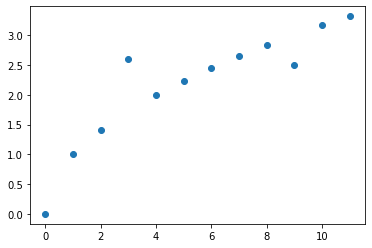

In [13]:
fake_data = pd.DataFrame({
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    # 'y': [-3, 14, 16, 9, 12, 14, 39, 63]
    'y': [0.0, 1.0, 1.4142135623730951, 2.6, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 2.5, 3.1622776601683795, 3.3166247903554]
})

plt.scatter(fake_data['x'], fake_data['y'])

In [14]:
columns = ['x']
predicted_columns = []
for i in range(1,40):
    column = f'xToThePowerOf{i}'
    columns.append(column)
    fake_data[column] = fake_data['x'] ** i
    model = LinearRegression()
    model.fit(fake_data[columns], fake_data['y'])
    predicted_column = f'predictedFrom{i}'
    predicted_columns.append(predicted_column)
    fake_data[predicted_column] = model.predict(fake_data[columns])

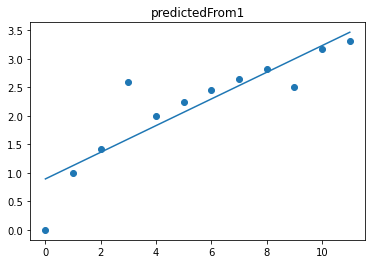

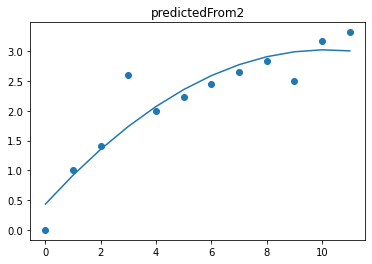

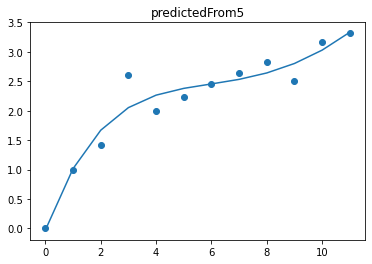

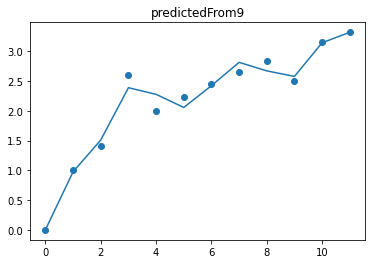

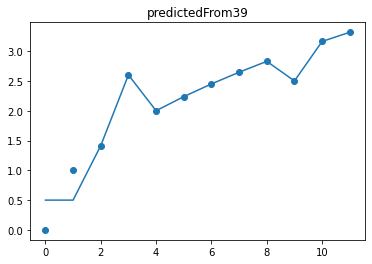

In [15]:
for predicted_column in ['predictedFrom1', 'predictedFrom2', 'predictedFrom5', 'predictedFrom9', 'predictedFrom39']:
    plt.title(predicted_column)
    plt.scatter(fake_data['x'], fake_data['y'])
    plt.plot(fake_data[predicted_column])
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X = train_df[['livingArea']]
y = train_df['price']

errors = []

for i in range(4):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=i)
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions, y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[109306.96102433567, 112630.12515163988, 111747.26282728216, 113210.77059663818]
average error: 111723.77989997398


In [17]:
X = train_df.drop(['city', 'state', 'lotUnit','price'], axis=1)
y = train_df['price']

errors = []

for i in range(4):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=i)
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions, y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[97526.55199002981, 100371.33994529149, 98706.8012014351, 100841.22200880051]
average error: 99361.47878638923


In [18]:
X = pd.get_dummies(train_df.drop(['city', 'lotUnit','price'], axis=1), columns=['state'])
y = train_df['price']

errors = []

for i in range(4):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=i)
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions, y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[60098.88785341301, 61515.42574696778, 60452.11171110325, 62165.674432656066]
average error: 61058.02493603502


In [19]:
X

bathrooms  bedrooms  livingArea  ...  state_WI  state_WV  state_WY
id                                      ...                              
0            3.0       4.0      3078.0  ...         0         0         0
1            5.0       5.0      3722.0  ...         0         0         0
2            2.0       3.0      1388.0  ...         0         0         0
3            4.0       3.0      2972.0  ...         0         0         0
4            3.0       2.0      1926.0  ...         0         0         0
...          ...       ...         ...  ...       ...       ...       ...
22851        2.0       3.0      2428.0  ...         0         0         0
22852        2.0       3.0      1600.0  ...         0         0         0
22853        2.0       3.0      1605.0  ...         0         0         0
22854        2.0       2.0      1810.0  ...         0         0         0
22855        1.0       2.0       890.0  ...         0         0         0

[22856 rows x 60 columns]

In [20]:
from sklearn.neural_network import MLPRegressor

X = pd.get_dummies(train_df.drop(['city', 'lotUnit','price'], axis=1), columns=['state'])
y = train_df['price']

errors = []

for i in range(1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=i)
  model = MLPRegressor(hidden_layer_sizes=[30,20,5])
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  errors.append(mean_absolute_error(predictions, y_test))

print(errors)
print(f'average error: {np.mean(errors)}')

[101135.36944589176]
average error: 101135.36944589176


In [21]:
test = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/test.csv', index_col='id')
test.head()

zipcode  ...                                        address
id              ...                                               
22805  19970.0  ...  37150 Lord Baltimore Ln, Ocean View, DE 19970
18392  27704.0  ...             2011 Woodview Dr, Durham, NC 27704
15215  20733.0  ...          1109 Wildwood Ln, Churchton, MD 20733
20235  33064.0  ...      3130 NE 12th Ave, Pompano Beach, FL 33064
13810   6239.0  ...               235 Ross Rd, Killingly, CT 06239

[5 rows x 12 columns]

In [22]:
test.drop(['homeStatus', 'dateSold', 'address'], axis=1, inplace=True)

def convert_lot_area(row):
    if row['lotUnit'] == 'acres':
        return row['lotArea'] * 43560
    else:
        return row['lotArea']

test['lotArea'] = test.apply(convert_lot_area, axis=1)

test.drop(['lotUnit'], inplace=True, axis=1)

test = pd.get_dummies(test, columns=['homeType'])

print(test.head())

zip_code_df = pd.read_csv('https://raw.githubusercontent.com/wlifferth/build-an-ml-web-app/main/median_income_by_zip_code.csv')

zip_code_df['median_income']

test = pd.merge(test, zip_code_df, how='left', left_on='zipcode', right_on='zip_code').set_index(test.index)

test['median_income'].fillna(test['median_income'].mean(), inplace=True)

test.drop(['zipcode', 'zip_code'], axis=1, inplace=True)

test.head()

       zipcode           city  ... homeType_SINGLE_FAMILY  homeType_TOWNHOUSE
id                             ...                                           
22805  19970.0     Ocean View  ...                      1                   0
18392  27704.0         Durham  ...                      1                   0
15215  20733.0      Churchton  ...                      1                   0
20235  33064.0  Pompano Beach  ...                      1                   0
13810   6239.0      Killingly  ...                      1                   0

[5 rows x 11 columns]


city state  ...  homeType_TOWNHOUSE  median_income
id                          ...                                   
22805     Ocean View    DE  ...                   0        49786.0
18392         Durham    NC  ...                   0        37513.0
15215      Churchton    MD  ...                   0        41087.0
20235  Pompano Beach    FL  ...                   0        37070.0
13810      Killingly    CT  ...                   0        33438.0

[5 rows x 11 columns]

In [23]:
final_input = pd.get_dummies(test.drop(['city'], axis=1), columns=['state'])

X = pd.get_dummies(train_df.drop(['city', 'lotUnit','price'], axis=1), columns=['state'])
y = train_df['price']

model = LinearRegression()
model.fit(X, y)
test['price'] = model.predict(final_input)

In [24]:
import pickle

with open('model.pk', mode='wb+') as model_file:
  pickle.dump(model,model_file)


In [25]:
test['price'].to_csv('2021-01-14-submission.csv', index_label='id')